In [11]:
import os
import random
from datetime import datetime, timedelta
from faker import Faker
import numpy as np


In [2]:
functions = [
        {
            "name": "calculate_bmi",
            "description": "Calculate the Body Mass Index (BMI) based on weight and height.",
            "parameters": {
                "type": "object",
                "properties": {
                    "weight": {
                        "type": "number",
                        "description": "The weight of the individual in kilograms."
                    },
                    "height": {
                        "type": "number",
                        "description": "The height of the individual in centimeters."
                    }
                },
                "required": ["weight", "height"]
            }
        },
        {
            "name": "generate_password",
            "description": "Generate a secure password.",
            "parameters": {
                "type": "object",
                "properties": {
                    "passwd_length": {
                        "type": "integer",
                        "description": "The length of the password."
                    },
                    "include_special_chars": {
                        "type": "boolean",
                        "description": "Whether to include special characters in the password."
                    },
                    "include_numbers": {
                        "type": "boolean",
                        "description": "Whether to include numbers in the password."
                    }
                },
                "required": ["passwd_length"]
            }
        },
        {
            "name": "search_customer_details",
            "description": "Search for customer details in the database.",
            "parameters": {
                "type": "object",
                "properties": {
                    "customer_id": {
                        "type": "string",
                        "description": "The unique ID of the customer."
                    },
                    "name": {
                        "type": "string",
                        "description": "The name of the customer."
                    },
                    "email": {
                        "type": "string",
                        "description": "The email address of the customer."
                    }
                },
                "required": ["customer_id"]
            }
        },
        {
            "name": "check_loan_eligibility",
            "description": "Determine if a user is eligible for a loan.",
            "parameters": {
                "type": "object",
                "properties": {
                    "income": {
                        "type": "number",
                        "description": "The annual income of the individual."
                    },
                    "credit_score": {
                        "type": "integer",
                        "description": "The credit score of the individual."
                    },
                    "existing_loans": {
                        "type": "boolean",
                        "description": "Whether the individual has existing loans."
                    },
                    "age": {
                        "type": "integer",
                        "description": "The age of the individual."
                    }
                },
                "required": ["income", "credit_score", "age"]
            }
        },
        {
            "name": "calculate_loan_payment",
            "description": "Calculate the monthly payment for a loan.",
            "parameters": {
                "type": "object",
                "properties": {
                    "loan_amount": {
                        "type": "number",
                        "description": "The total amount of the loan."
                    },
                    "interest_rate": {
                        "type": "number",
                        "description": "The annual interest rate of the loan."
                    },
                    "term_years": {
                        "type": "integer",
                        "description": "The term of the loan in years."
                    }
                },
                "required": ["loan_amount", "interest_rate", "term_years"]
            }
        },
        {
            "name": "schedule_meeting",
            "description": "Schedule a meeting on the user's calendar.",
            "parameters": {
                "type": "object",
                "properties": {
                    "date": {
                        "type": "string",
                        "description": "The date of the meeting."
                    },
                    "time": {
                        "type": "string",
                        "description": "The time of the meeting."
                    },
                    "participants": {
                        "type": "array",
                        "description": "The email addresses of the participants."
                    },
                    "duration": {
                        "type": "string",
                        "description": "The duration of the meeting."
                    }
                },
                "required": ["date", "time", "participants"]
            }
        },
        {
            "name": "search_movie_info",
            "description": "Retrieve information about a movie.",
            "parameters": {
                "type": "object",
                "properties": {
                    "title": {
                        "type": "string",
                        "description": "The title of the movie."
                    },
                    "year": {
                        "type": "integer",
                        "description": "The release year of the movie."
                    },
                    "director": {
                        "type": "string",
                        "description": "The director of the movie."
                    }
                },
                "required": ["title"]
            }
        },
        {
            "name": "generate_email_template",
            "description": "Generate a formatted email template.",
            "parameters": {
                "type": "object",
                "properties": {
                    "recipient_name": {
                        "type": "string",
                        "description": "The name of the recipient."
                    },
                    "subject": {
                        "type": "string",
                        "description": "The subject of the email."
                    },
                    "body": {
                        "type": "string",
                        "description": "The body of the email."
                    },
                    "signature": {
                        "type": "string",
                        "description": "The email signature."
                    }
                },
                "required": ["recipient_name", "subject", "body"]
            }
        },
        {
            "name": "calculate_discount",
            "description": "Calculate the discounted price of an item.",
            "parameters": {
                "type": "object",
                "properties": {
                    "original_price": {
                        "type": "number",
                        "description": "The original price of the item."
                    },
                    "discount_percentage": {
                        "type": "number",
                        "description": "The discount percentage to be applied."
                    }
                },
                "required": ["original_price", "discount_percentage"]
            }
        },
        {
            "name": "search_internet",
            "description": "Perform an internet search based on the user's query.",
            "parameters": {
                "type": "object",
                "properties": {
                    "query": {
                        "type": "string",
                        "description": "The search query."
                    },
                    "language": {
                        "type": "string",
                        "description": "The language of the search results."
                    },
                    "filter_date": {
                        "type": "string",
                        "description": "A date filter for the search results."
                    }
                },
                "required": ["query"]
            }
        },
        {
            "name": "book_reservation",
            "description": "Book a reservation at a specified restaurant.",
            "parameters": {
                "type": "object",
                "properties": {
                    "date": {
                        "type": "string",
                        "description": "The date of the reservation."
                    },
                    "time": {
                        "type": "string",
                        "description": "The time of the reservation."
                    },
                    "restaurant_name": {
                        "type": "string",
                        "description": "The name of the restaurant."
                    },
                    "number_of_people": {
                        "type": "integer",
                        "description": "The number of people for the reservation."
                    }
                },
                "required": ["date", "time", "restaurant_name", "number_of_people"]
            }
        },
        {
            "name": "search_stock_info",
            "description": "Retrieve current or historical stock information.",
            "parameters": {
                "type": "object",
                "properties": {
                    "stock_symbol": {
                        "type": "string",
                        "description": "The symbol of the stock."
                    },
                    "date": {
                        "type": "string",
                        "description": "The date for historical stock data."
                    }
                },
                "required": ["stock_symbol"]
            }
        },
        {
            "name": "rate_movie",
            "description": "Rate and review a movie.",
            "parameters": {
                "type": "object",
                "properties": {
                    "movie_id": {
                        "type": "string",
                        "description": "The unique identifier of the movie."
                    },
                    "user_rating": {
                        "type": "number",
                        "description": "The user rating of the movie."
                    },
                    "review_text": {
                        "type": "string",
                        "description": "An optional review text."
                    }
                },
                "required": ["movie_id", "user_rating"]
            }
        },
        {
            "name": "retrieve_phone_number",
            "description": "Search for and retrieve a contact's phone number.",
            "parameters": {
                "type": "object",
                "properties": {
                    "contact_name": {
                        "type": "string",
                        "description": "The name of the contact."
                    },
                    "company": {
                        "type": "string",
                        "description": "The company associated with the contact."
                    }
                },
                "required": ["contact_name"]
            }
        },
        {
            "name": "calculate_calories_in_recipe",
            "description": "Calculate the total calories in a recipe.",
            "parameters": {
                "type": "object",
                "properties": {
                    "recipe_ingredients": {
                        "type": "array",
                        "description": "The ingredients of the recipe."
                    },
                    "servings": {
                        "type": "integer",
                        "description": "The number of servings."
                    }
                },
                "required": ["recipe_ingredients", "servings"]
            }
        },
        {
            "name": "provide_health_tips",
            "description": "Provide personalized health tips based on the user’s profile.",
            "parameters": {
                "type": "object",
                "properties": {
                    "age": {
                        "type": "integer",
                        "description": "The age of the individual."
                    },
                    "gender": {
                        "type": "string",
                        "description": "The gender of the individual."
                    },
                    "health_conditions": {
                        "type": "array",
                        "description": "A list of health conditions."
                    }
                },
                "required": ["age", "gender"]
            }
        },
        {
            "name": "check_payment_status",
            "description": "Check the status of a payment transaction.",
            "parameters": {
                "type": "object",
                "properties": {
                    "transaction_id": {
                        "type": "string",
                        "description": "The unique identifier of the transaction."
                    },
                    "payment_method": {
                        "type": "string",
                        "description": "The method used for the payment."
                    }
                },
                "required": ["transaction_id"]
            }
        },
        {
            "name": "calculate_retirement_savings",
            "description": "Project the savings at retirement based on current contributions.",
            "parameters": {
                "type": "object",
                "properties": {
                    "current_age": {
                        "type": "integer",
                        "description": "The current age of the individual."
                    },
                    "retirement_age": {
                        "type": "integer",
                        "description": "The desired retirement age."
                    },
                    "current_savings": {
                        "type": "number",
                        "description": "The current amount of savings."
                    },
                    "monthly_contribution": {
                        "type": "number",
                        "description": "The monthly contribution towards retirement savings."
                    }
                },
                "required": ["current_age", "retirement_age", "current_savings", "monthly_contribution"]
            }
        },
        {
            "name": "find_recipe",
            "description": "Search for recipes based on available ingredients.",
            "parameters": {
                "type": "object",
                "properties": {
                    "ingredient_list": {
                        "type": "array",
                        "description": "A list of ingredients available."
                    },
                    "dietary_restrictions": {
                        "type": "string",
                        "description": "Any dietary restrictions to consider."
                    },
                    "meal_type": {
                        "type": "string",
                        "description": "The type of meal (e.g., breakfast, lunch, dinner)."
                    }
                },
                "required": ["ingredient_list"]
            }
        },
        {
            "name": "create_todo_list",
            "description": "Create and organize a to-do list with tasks, deadlines, and priorities.",
            "parameters": {
                "type": "object",
                "properties": {
                    "task_list": {
                        "type": "array",
                        "description": "A list of tasks to be completed."
                    },
                    "due_dates": {
                        "type": "array",
                        "description": "The due dates for each task."
                    },
                    "priorities": {
                        "type": "array",
                        "description": "The priority levels for each task."
                    }
                },
                "required": ["task_list"]
            }
        }
    ]



In [3]:
questions_dict = {
    "calculate_bmi": [
        "Could you calculate the Body Mass Index (BMI)? My weight is {weight} and my height is {height}.",
        "Can you please calculate my BMI? My weight is {weight} and my height is {height}.",
        "I need my BMI. My weight is {weight} and my height is {height}.",
        "What is my BMI if my weight is {weight} and my height is {height}?",
        "Can you help me find out my BMI? My weight is {weight} and my height is {height}."
    ],
    "generate_password": [
        "Could you generate a secure password with length {passwd_length}?",
        "I need a strong password of {passwd_length} characters.",
        "Can you create a password with length {passwd_length}?",
        "Please generate a password of {passwd_length} characters.",
        "Can you make a secure password with {passwd_length} characters, including special characters: {include_special_chars} and numbers: {include_numbers}?"
    ],
    "search_customer_details": [
        "Can you search for customer details in the database? The customer ID is {customer_id}.",
        "I need information on a customer with ID {customer_id}.",
        "Could you look up the details for a customer with ID {customer_id}?",
        "Please find the details of a customer in the database. The customer ID is {customer_id}.",
        "Can you retrieve the information for a customer with ID {customer_id}?"
    ],
    "check_loan_eligibility": [
        "Can you determine if I'm eligible for a loan? My income is {income}, credit score is {credit_score}, and age is {age}.",
        "Am I eligible for a loan with an income of {income}, credit score of {credit_score}, and age of {age}?",
        "Can you check my loan eligibility? My income is {income}, credit score is {credit_score}, and age is {age}.",
        "Please evaluate my loan eligibility with an income of {income}, credit score of {credit_score}, and age of {age}.",
        "Can you find out if I qualify for a loan? My income is {income}, credit score is {credit_score}, and age is {age}."
    ],
    "calculate_loan_payment": [
        "Can you calculate the monthly payment for a loan of {loan_amount} with an interest rate of {interest_rate}% over {term_years} years?",
        "I need to know my loan payment amount. The loan amount is {loan_amount}, interest rate is {interest_rate}%, and the term is {term_years} years.",
        "Please calculate the loan payment for a loan of {loan_amount} at {interest_rate}% interest over {term_years} years.",
        "Can you figure out my monthly loan payment for a {loan_amount} loan with {interest_rate}% interest over {term_years} years?",
        "How much will my loan payment be for {loan_amount} with an interest rate of {interest_rate}% over {term_years} years?"
    ],
    "schedule_meeting": [
        "Can you schedule a meeting on {date} at {time} with the following participants: {participants}?",
        "I need to book a meeting on {date} at {time} with {participants}.",
        "Please set up a meeting on {date} at {time} with {participants}.",
        "Can you arrange a meeting on {date} at {time} with {participants}?",
        "Can you schedule a meeting with participants {participants} on {date} at {time}?"
    ],
    "search_movie_info": [
        "Can you retrieve information about the movie titled {title}?",
        "I need details on the movie {title}.",
        "Can you look up information on the movie {title} released in {year}?",
        "Please find details about the movie {title} directed by {director}.",
        "Can you get information about the movie {title}?"
    ],
    "generate_email_template": [
        "Can you generate a formatted email template for {recipient_name}? The subject is {subject} and the body is {body}.",
        "I need an email template for {recipient_name} with the subject {subject} and the body {body}.",
        "Can you create an email template for {recipient_name} with the subject {subject}?",
        "Please generate a template for an email to {recipient_name} with the subject {subject} and body {body}.",
        "Can you draft an email template for {recipient_name} with the subject {subject} and signature {signature}?"
    ],
    "calculate_discount": [
        "Can you calculate the discounted price of an item with an original price of {original_price} and a discount of {discount_percentage}%?",
        "I need to know the discounted price for an item originally priced at {original_price} with a {discount_percentage}% discount.",
        "Please calculate the discount for an item that costs {original_price} with a {discount_percentage}% discount.",
        "How much is the discount on an item that costs {original_price} with a {discount_percentage}% discount?",
        "Can you figure out the discount price for an item with an original price of {original_price} and a {discount_percentage}% discount?"
    ],
    "search_internet": [
        "Can you perform an internet search for '{query}'?",
        "I need to search for '{query}' online.",
        "Can you search the web for '{query}'?",
        "Please look up '{query}' on the internet.",
        "Can you find information on '{query}' in {language} language and filter by {filter_date}?"
    ],
    "book_reservation": [
        "Can you book a reservation at {restaurant_name} on {date} at {time} for {number_of_people} people?",
        "I need to make a reservation at {restaurant_name} on {date} at {time} for {number_of_people} people.",
        "Please book a table at {restaurant_name} on {date} at {time} for {number_of_people}.",
        "Can you arrange a reservation at {restaurant_name} on {date} at {time} for {number_of_people} people?",
        "Can you book a dinner reservation for {number_of_people} at {restaurant_name} on {date} at {time}?"
    ],
    "search_stock_info": [
        "Can you retrieve the stock information for {stock_symbol}?",
        "I need stock information for {stock_symbol}.",
        "Can you look up stock details for {stock_symbol}?",
        "Please find information on the stock {stock_symbol} for the date {date}.",
        "Can you provide stock information for {stock_symbol}?"
    ],
    "rate_movie": [
        "Can you rate the movie with ID {movie_id}? My rating is {user_rating}.",
        "I want to rate the movie {movie_id}. My rating is {user_rating}.",
        "Please review the movie {movie_id} with a rating of {user_rating}.",
        "Can you help me rate the movie {movie_id}? My rating is {user_rating}.",
        "Can you give a rating of {user_rating} for the movie {movie_id}?"
    ],
    "retrieve_phone_number": [
        "Can you retrieve the phone number for {contact_name}?",
        "I need a phone number for {contact_name}.",
        "Can you find the phone number for {contact_name}?",
        "Please look up the phone number for {contact_name} at {company}.",
        "Can you get the phone number of {contact_name} from the contact list?"
    ],
    "calculate_calories_in_recipe": [
        "Can you calculate the total calories in a recipe with the following ingredients: {recipe_ingredients}?",
        "I need to know the calories in a recipe with {recipe_ingredients}.",
        "Please calculate the calories for this recipe with {recipe_ingredients} for {servings} servings.",
        "Can you figure out the calorie count for a recipe using {recipe_ingredients}?",
        "How many calories are in this recipe with {recipe_ingredients} and {servings} servings?"
    ],
    "provide_health_tips": [
        "Can you provide personalized health tips for someone aged {age} and gender {gender}?",
        "I need some health tips for a {age}-year-old {gender}.",
        "Please give me health advice for a {age}-year-old {gender}.",
        "Can you suggest health tips for a {age}-year-old {gender}?",
        "Can you offer health tips for a {age}-year-old {gender} with the following health conditions: {health_conditions}?"
    ],
    "check_payment_status": [
        "Can you check the status of a payment transaction with ID {transaction_id}?",
        "I need to know the status of my payment with transaction ID {transaction_id}.",
        "Can you verify a payment with transaction ID {transaction_id}?",
        "Please check the payment status for transaction ID {transaction_id}.",
        "Can you find out if my payment with transaction ID {transaction_id} went through?"
    ],
    "calculate_retirement_savings": [
        "Can you project my savings at retirement? My current age is {current_age}, I plan to retire at {retirement_age}, my current savings are {current_savings}, and I contribute {monthly_contribution} monthly.",
        "I need to calculate my retirement savings. My current age is {current_age}, I want to retire at {retirement_age}, and I save {monthly_contribution} per month.",
        "Please estimate my retirement savings. I am {current_age} years old, I want to retire at {retirement_age}, and I currently have {current_savings} saved.",
        "Can you calculate how much I will have saved by retirement? My current age is {current_age}, I will retire at {retirement_age}, I currently have {current_savings} in savings, and I contribute {monthly_contribution} monthly.",
        "Can you figure out my retirement savings? I'm {current_age}, planning to retire at {retirement_age}, with current savings of {current_savings}, and monthly contributions of {monthly_contribution}."
    ],
    "find_recipe": [
        "Can you search for recipes using the following ingredients: {ingredient_list}?",
        "I need a recipe with these ingredients: {ingredient_list}.",
        "Please find a recipe that uses {ingredient_list}.",
        "Can you look up a recipe using these ingredients: {ingredient_list}?",
        "Can you suggest a recipe based on my ingredients: {ingredient_list} and dietary restrictions {dietary_restrictions}?"
    ],
    "create_todo_list": [
        "Can you create and organize a to-do list with the following tasks: {task_list}?",
        "I need to make a to-do list with tasks {task_list}.",
        "Please organize my tasks {task_list} into a to-do list.",
        "Can you set up a to-do list with these tasks: {task_list}?",
        "Can you help me create a to-do list with the tasks {task_list}, due dates {due_dates}, and priorities {priorities}?"
    ]
}


In [4]:
def get_randon_question(function_name:str, questions_dict: dict[str: list[str]]) ->str:
    question_list = questions_dict.get(function_name)
    if question_list:
        return random.choice(question_list)
    else:
        return ""  

def get_random_value(param:str, data_type:str) -> str|float|int|list[str]:
    fake = Faker()

    if data_type == "boolean":
        return random.choice([True, False])
    elif param == "date":
        return datetime(2024, 10, 1) + timedelta(days=random.randint(0, 365))
    elif param == "time":
        hour = random.randint(1, 12)
        period = random.choice(["AM", "PM"])
        return f"{hour} {period.lower()}"
    elif param == "weight":
        return random.randint(60, 95)
    elif param == "height":
        return random.randint(55, 110)
    elif param == "length":
        return random.randint(5, 20)
    elif param == "password_length":
        return random.randint(5, 20)
    elif param == "age":
        return random.randint(10, 90)
    elif param == "gender":
        return  random.choice(["Male", "Female"])
    elif param == "servings":
        return random.randint(1, 10)
    elif param ==  'loan_amount':
        return random.randint(600, 950000)
    elif param ==  'interest_rate':
        return random.random()*100
    elif param ==  'term_years':
        return random.randint(1, 30)
    elif param ==  'customer_id':
        return random.randint(100, 9999)
    elif param ==  'income':
        return random.randint(10000, 300000)
    elif param ==  'credit_score':
        return random.random()*100
    elif param ==  'original_price':
        return random.randint(100, 9999)
    elif param ==  'discount_percentage':
        return random.random()*100
    elif param ==  'number_of_people':
        return random.randint(1, 15)
    elif param ==  'movie_id':
        return random.randint(10000, 300000)
    elif param ==  'user_rating':
        return random.randint(1, 5)
    elif param == 'participants':
        return [fake.name() for _ in range(random.randint(2, 10))]
    
    elif param == 'title':
        return fake.sentence(nb_words=6)
    
    elif param == 'recipient_name':
        return fake.name()
    
    elif param == 'subject':
        return fake.sentence(nb_words=4)
    
    elif param == 'body':
        return fake.paragraph(nb_sentences=5)
    
    elif param == 'query':
        return fake.sentence(nb_words=5)
    
    elif param == 'restaurant_name':
        return fake.company()
    
    elif param == 'stock_symbol':
        return fake.lexify(text='???').upper()
    
    elif param == 'contact_name':
        return fake.name()
    
    elif param == 'recipe_ingredients':
        return [fake.word() for _ in range(random.randint(3, 10))]
    
    elif param == 'transaction_id':
        return fake.uuid4()
    
    elif param == 'current_age':
        return random.randint(18, 80)
    
    elif param == 'retirement_age':
        return random.randint(60, 70)
    
    elif param == 'current_savings':
        return round(random.uniform(1000.0, 500000.0), 2)
    
    elif param == 'monthly_contribution':
        return round(random.uniform(100.0, 5000.0), 2)
    
    elif param == 'ingredient_list':
        return [fake.word() for _ in range(random.randint(5, 15))]
    
    elif param == 'task_list':
        return [fake.sentence(nb_words=6) for _ in range(random.randint(3, 7))]
    
    elif data_type == "number":
        return random.randint(1, 100)
    elif data_type == "integer":
        return random.randint(1, 100)
    elif data_type == "string":
        return fake.word()
    elif data_type == "array":
        return [fake.word() for _ in range(random.randint(5, 15))]
    else:
        return -1

In [5]:
def generate_function_call_message(functions: list, questions_dict: dict[str: list[str]]) -> list:
    
    # message initialization
    messages = []
    previous_function = None

    for function in functions:

        name = function['name']
        description = function['description']
        parameters = function['parameters']['properties']
        required = function['parameters'].get('required', [])
        
        
        # Create a scenario message
        system_message = "<|im_start|>system\nYou are a helpful assistant with access to the following functions. Use these functions when they are relevant to assist with a user's request\n"
        system_message += "[{\n"
        system_message += f'    "name": "{name}",\n'
        system_message += f'    "description": "{description}",\n'
        system_message += '    "parameters": {\n'
        system_message += '        "type": "object",\n'
        system_message += '        "properties": {\n'
        
        for param, param_details in parameters.items():
            system_message += f'            "{param}": {{\n'
            system_message += f'                "type": "{param_details["type"]}",\n'
            system_message += f'                "description": "{param_details["description"]}"\n'
            system_message += '            },\n'
        
        system_message += '        },\n'
        system_message += f'        "required": {required}\n'
        system_message += '    }\n'
        system_message += '}]<|im_end|>\n'
        

        for i in range(random.randint(10, 100)):
            
            
            user_message = "<|im_start|>user\n"
            function_args = {}
            # for param in required:
            for param, param_details in parameters.items():
                param_type = param_details['type']
                function_args[param] = get_random_value(param, param_type)


            user_message += get_randon_question(name, questions_dict).format(**function_args)
            user_message += "<|im_end|>\n"
                     
            assistant_message = f'<|im_start|>assistant\n<functioncall> {{"name": "{name}", "arguments": "{function_args}"}} <|im_end|><|endoftext|>'
            
            scenario_message = {'system': system_message, 'user': user_message, 'assistant': assistant_message}
            messages.append(scenario_message)
        
        # Add questions not rellated with the function
        if previous_function:
            previous_name = previous_function['name']
            previous_parameters = previous_function['parameters']['properties']
            
            for i in range(random.randint(2, 10)):

                user_message = "<|im_start|>user\n"
                function_args = {}
                for param, param_details in previous_parameters.items():
                    param_type = param_details['type']
                    function_args[param] = get_random_value(param, param_type)

                user_message += get_randon_question(previous_name, questions_dict).format(**function_args)
                user_message += "<|im_end|>\n"
                
                assistant_message = f"<|im_start|>assistant\nI'm sorry, but I don't have the capability to answar your request. My current function allows me to {description.lower().split('.')[0]}<|im_end|><|endoftext|>"
                
                scenario_message = {'system': system_message, 'user': user_message, 'assistant': assistant_message}
                
                messages.append(scenario_message)
        previous_function = function
    return messages

# Generate messages
messages = generate_function_call_message(functions, questions_dict)

# save the messages
np.save('./data/messages.npy', messages)



In [6]:
import json
with open("./data/messages.json", "w") as file:
    json.dump(messages, file, indent=4)

In [25]:
messages = np.load('./data/messages.npy', allow_pickle=True)

messages[100]['system']

len(messages)

1248

In [26]:
from collections import Counter

function_counter = Counter()

# Iterate through the records and extract function names where applicable
for record in messages:
    assistant_response = record['assistant']
    if '<functioncall>' in assistant_response:
        # Extract the function name
        function_name = assistant_response.split('"name": ')[1].split(',')[0].replace('"', '').strip()
        function_counter[function_name] += 1
    else:
        function_counter['Error'] += 1

# Convert to a dictionary for easier use in visualization
function_data = dict(function_counter)


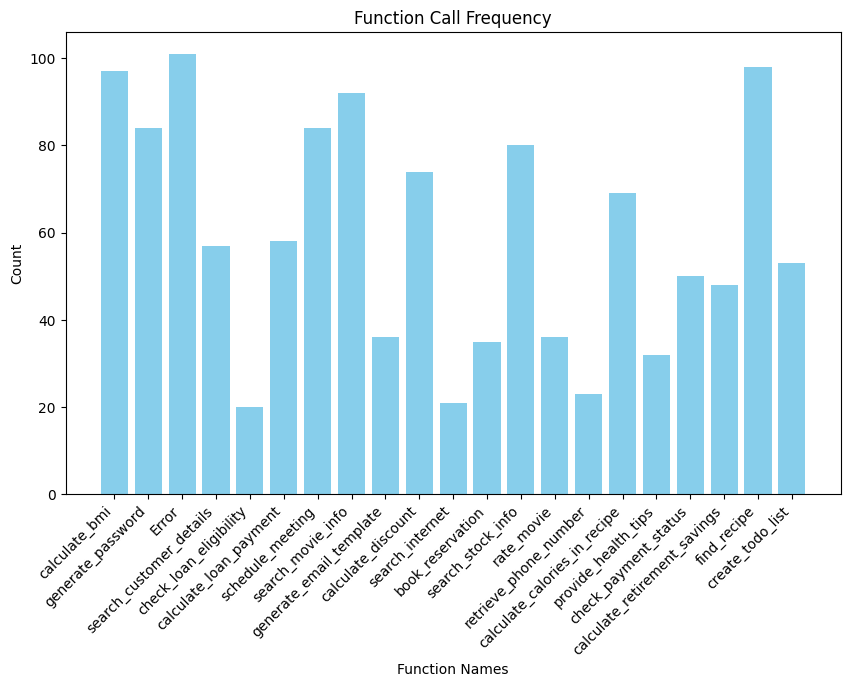

In [28]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(function_data.keys(), function_data.values(), color='skyblue')
plt.xlabel('Function Names')
plt.ylabel('Count')
plt.title('Function Call Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()